In [31]:
import csv
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib as mpl
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import statistics as st
from AGN_reg_note import *
from scipy.stats import sem
from _global_ import *

gama_file = r'E:\rabbit_hole\Oleg_GAMA_belowMS.txt'

def SFR(HA, HA_er, z):
        if HA == -99999.0 or HA_er < 0: 
            return -99.9, -99.9
        
        cosmo = FlatLambdaCDM(H0=75 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
        d_mpc = float(str(cosmo.luminosity_distance(z)).split(' ')[0])

        if HA + 2*HA_er > 0 and HA < 2*HA_er:
            HA += 2*HA_er
            SFR = (7.52*10**(-10)*4*np.pi*(d_mpc**2)*HA/(1+z))
            SFR_er = '-'
            return SFR, SFR_er
        elif HA > 2*HA_er:
            SFR = (7.52*10**(-10)*4*np.pi*(d_mpc**2)*HA/(1+z))
            SFR_er = SFR*(HA_er/HA)
            return SFR, SFR_er
        else:
            return -99.9, -99.9
        
def changer(element):
    if element == '""':
        return -99999.0
    else:
        return float(element)
    
def ew_proc(HA_ew, HA_ew_err):
    pair_HA = []
    HA_ew_or = HA_ew
    if HA_ew == -99999.0 or HA_ew_err < 0:
        return -99999.0, -99999.0, pair_HA
    else:
        if HA_ew > 0 and HA_ew < 2*HA_ew_err:
            pair_HA = ['down']
            HA_ew += 2*HA_ew_err
        elif HA_ew < 0 and HA_ew + 2*HA_ew_err <= 0:
            pair_HA = ['down']
            HA_ew = 2*HA_ew_err
        elif HA_ew < 0 and HA_ew + 2*HA_ew_err > 0:
            pair_HA = ['down']
            HA_ew += 2*HA_ew_err
        elif HA_ew > 0 and HA_ew >= 2*HA_ew_err:
            pair_HA = []
        else:
            print("Forgot me!")

        return math.log(HA_ew, 10), HA_ew_err, pair_HA
        
#pars_initializing

color_dict = color_dict
# color_dict ={
            # 'AGN' : ['midnightblue', 15, '.'],
            # 'AGNX' : ['midnightblue', 15, '.'],
            # 'AGNY' : ['midnightblue', 15, '.'],
            # 'UNC' : ['springgreen', 9, '.'],
            # 'UNCX' : ['springgreen', 9, '.'],
            # 'UNCY' : ['springgreen', 9, '.'],
            # 'SF' : ['mediumvioletred', 9, '.'],
            # 'SFX' : ['mediumvioletred', 9, '.'],
            # 'SFY' : ['mediumvioletred', 9, '.'],
            # 'NOEL' : ['orchid', 9, '.'],
            # 'NDA' : ['gold', 9, '.']
        # }

        #self.cd_WHAN = {
        #    'NOEL' : ['orchid', 24, '.'],
        #    'NDA' : ['gold', 24, '.'],
        #    'LLR' : ['maroon', 24, '.'],
        #    'ELR' : ['red', 24, '.'],
        #    'SF' : ['mediumvioletred', 24, '.'],
        #    'wAGN' : ['blue', 24, '.'],
        #    'sAGN' : ['midnightblue', 24, '.'],
        #}
cd_WHAN = cd_WHAN

with open(gama_file, 'r') as f:
    lines = f.readlines()
    stripped_lines = [item.strip() for item in lines]

    SURV = []
    IS_BEST = []
    IS_SBEST = []
    CATAID = []
    Z = []
    MS_16 = []
    MS = []
    MS_84 = []
    TC_16 = []
    TC = []
    TC_84 = []
    TW_16 = []
    TW = []
    TW_84 = []
    MD_16 = []
    MD = []
    MD_84 = []
    age_16 = []
    age = []
    age_84 = []
    SFR_16 = []
    SFR_50 = []
    SFR_84 = []
    SFR_HA = []
    SFR_HA_er = []
    P100 = []
    P100_er = []
    HA = []
    HA_er = []
    HB = []  # should I include errors of HA and HB
    HB_er = []
    OIII = []
    OIII_er = []  # OIIIB, 5007
    NII = []
    NII_er = [] # NIIB, 6583
    HA_EW = []
    HA_EW_ERR = []
    SII = []
    SII_er = []
    OI = []
    OI_er = []
    OII = []
    OII_er = []
    BMS = []

    FLAGS_BPT = []
    FLAGS_WHAN = []

    HGA = []
    HGA_er = []
    HDA = []
    HDA_er = []

    HGF = []
    HGF_er = []
    HDF = []
    HDF_er = []

    r = []
    r_er = []

    SFR_50_M = []

for line in stripped_lines:
    data = line.split()
    if data[742] == 'true' and data[743] == 'true' and (data[740] == 'GAMA' or data[740] == 'SDSS'):
    #pars required
        CATAID.append(changer(data[0]))
        Z.append(changer(data[1]))
        MS_16.append(changer(data[34]))
        MS.append(changer(data[35]))
        MS_84.append(changer(data[36]))

        TC_16.append(changer(data[46]))
        TC.append(changer(data[47]))
        TC_84.append(changer(data[48]))

        TW_16.append(changer(data[52]))
        TW.append(changer(data[53]))
        TW_84.append(changer(data[54]))

        MD_16.append(changer(data[88]))
        MD.append(changer(data[89]))
        MD_84.append(changer(data[90]))

        age_16.append(changer(data[124]))
        age.append(changer(data[125]))
        age_84.append(changer(data[126]))

        P100.append(changer(data[724]))
        P100_er.append(changer(data[725]))

        HA.append(changer(data[816]))
        HA_er.append(changer(data[815]))
        HB.append(changer(data[916]))  # should I include errors of HA and HB
        HB_er.append(changer(data[915]))
        OIII.append(changer(data[901]))
        OIII_er.append(changer(data[900]))  # OIIIB, 5007
        NII.append(changer(data[806]))
        NII_er.append(changer(data[805]))  # NIIR, 6583
        HA_EW.append(changer(data[814]))
        HA_EW_ERR.append(changer(data[813]))

        HGF.append(changer(data[961]))
        HGF_er.append(changer(data[960]))
        HDF.append(changer(data[991]))
        HDF_er.append(changer(data[990]))

        HGA.append(changer(data[966]))
        HGA_er.append(changer(data[965]))
        HDA.append(changer(data[996]))
        HDA_er.append(changer(data[995]))

        SII.append(changer(data[801]))
        SII_er.append(changer(data[800]))
        OI.append(changer(data[831]))
        OI_er.append(changer(data[830]))
        OII.append(changer(data[1001]))
        OII_er.append(changer(data[1000]))

        SURV.append(data[740])
        IS_BEST.append(data[742])
        IS_SBEST.append(data[743])

        BMS.append(changer(data[-1]))

        SFR_50.append(changer(data[95]))
        SFR_16.append(changer(data[94]))
        SFR_84.append(changer(data[96]))

        SFR_50_M.append(changer(data[140]))

        r.append(changer(data[700]))
        r_er.append(changer(data[701]))

#no need in dust correction for BPT, this is what BPT is about (CLOUDY example)


In [32]:
for i in range(len(CATAID)):
    if IS_BEST[i] == 'true' and IS_SBEST[i] == 'true' and (SURV[i] == 'SDSS' or SURV[i] == 'GAMA'):
        ha_ew, ha_ew_err, pair_HA = ew_proc(HA_EW[i], HA_EW_ERR[i])
        AGN, x, X_er, pair_x_flag, y, Y_er, pair_y_flag, SC_WHAN, x_S, x_S_er, pair_x_S_flag, x_O, x_O_er, pair_x_O_flag, y_OII, y_er_OII, pair_y_OII = AGN_reg(OIII[i], OIII_er[i], HB[i], HB_er[i], NII[i], NII_er[i], HA[i], HA_er[i], ha_ew, ha_ew_err, pair_HA, SII[i], SII_er[i], OI[i], OI_er[i], OII[i], OII_er[i])
        FLAGS_BPT.append(AGN)
        FLAGS_WHAN.append(SC_WHAN)

In [33]:
dict_class = {
    'sAGN' : [[], [], []],
    'wAGN' : [[], [], []],
    'SF' : [[], [], []],
    'UNC' : [[], [], []],
    'RG' : [[], [], []],
    'ELR' : [[], [], []],
    'LLR' : [[], [], []],
    'NDA' : [[], [], []]
}

cosmo = FlatLambdaCDM(H0=75 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

k = 0
for i in range(len(CATAID)):

    if FLAGS_BPT[i] in ['AGNXY', 'AGNY'] or FLAGS_WHAN[i] in ['sAGN']:
        k += 1

    if OII[i] > 2*OII_er[i] and OII[i] > 0:
        d_mpc = float(str(cosmo.luminosity_distance(Z[i])).split(' ')[0])
        dict_class[FLAGS_WHAN[i]][0].append(4*np.pi*(d_mpc**2)*OII[i])
    if HGA[i] > 2*HGA_er[i] and HGA[i] > 0:
        d_mpc = float(str(cosmo.luminosity_distance(Z[i])).split(' ')[0])
        dict_class[FLAGS_WHAN[i]][1].append(4*np.pi*(d_mpc**2)*HGA[i])
    if HDA[i] > 2*HDA_er[i] and HDA[i] > 0:
        d_mpc = float(str(cosmo.luminosity_distance(Z[i])).split(' ')[0])
        dict_class[FLAGS_WHAN[i]][2].append(4*np.pi*(d_mpc**2)*HDA[i])

print(k)

for key in dict_class.keys():
    try:
        print(f'{key} & {round(st.mean(dict_class[key][0]), 0)} & {round(st.mean(dict_class[key][1]), 0)} &  {round(st.mean(dict_class[key][2]), 0)}' + r'\\')
    except:
        print(key)

514
sAGN & 1476296429.0 & 1430504394.0 &  1181471090.0\\
wAGN & 777996358.0 & 701534379.0 &  235737196.0\\
SF & 1678840831.0 & 1179386006.0 &  1009397781.0\\
UNC & 479751541.0 & 704621932.0 &  640269299.0\\
RG & 668122539.0 & 955879698.0 &  758310378.0\\
ELR & 584965663.0 & 639509322.0 &  270556415.0\\
LLR & 353058699.0 & 789578697.0 &  438114156.0\\
NDA


In [34]:
dict_class = {
    'sAGN' : [[], [], [], [], [], []],
    'wAGN' : [[], [], [], [], [], []],
    'SF' : [[], [], [], [], [], []],
    'UNC' : [[], [], [], [], [], []],
    'RG' : [[], [], [], [], [], []],
    'ELR' : [[], [], [], [], [], []],
    'LLR' : [[], [], [], [], [], []],
    'NDA' : [[], [], [], [], [], []]
}

cosmo = FlatLambdaCDM(H0=75 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

for i in range(len(CATAID)):

    if OII[i] > 2*OII_er[i] and OII_er[i] > 0:
        dict_class[FLAGS_WHAN[i]][0].append(OII[i]/OII_er[i])
    if HDA[i] > 2*HDA_er[i] and HDA_er[i] > 0:
        dict_class[FLAGS_WHAN[i]][1].append(HDA[i]/HDA_er[i])
    if HDF[i] > 2*HDF_er[i] and HDF_er[i] > 0:
        dict_class[FLAGS_WHAN[i]][2].append(HDF[i]/HDF_er[i])

    if HGA[i] > 2*HGA_er[i] and HGA_er[i] > 0:
        dict_class[FLAGS_WHAN[i]][3].append(HGA[i]/HGA_er[i])
    if HGF[i] > 2*HGF_er[i] and HGF_er[i] > 0:
        dict_class[FLAGS_WHAN[i]][4].append(HGF[i]/HGF_er[i])
    dict_class[FLAGS_WHAN[i]][5].append(r[i])

for key in dict_class.keys():
    print(f'{key} & ', end = '' )
    for item in dict_class[key][:-1]:
        try:
            print('${:.2f} \pm {:.2f}$ & '.format(st.mean(item), sem(item)), end='')
        except:
            print(' - & ', end='')
    try:
        print('${:.5f} \pm {:.5f}$ '.format(st.mean(dict_class[key][-1]), sem(dict_class[key][-1])) + r'\\')
    except:
        print(' - & ', end='')

sAGN & $10.51 \pm 0.70$ & $6.32 \pm 0.79$ & $5.47 \pm 0.99$ & $8.24 \pm 0.88$ & $10.66 \pm 3.15$ & $0.00047 \pm 0.00006$ \\
wAGN & $6.90 \pm 0.62$ & $5.06 \pm 1.58$ &  - & $5.39 \pm 0.39$ & $3.87 \pm 0.47$ & $0.00060 \pm 0.00008$ \\
SF & $14.37 \pm 0.88$ & $6.68 \pm 1.00$ & $8.32 \pm 1.23$ & $6.55 \pm 0.62$ & $7.35 \pm 0.87$ & $0.00032 \pm 0.00003$ \\
UNC & $2.53 \pm 0.39$ & $2.87 \pm 0.42$ &  - & $3.33 \pm 0.45$ & $4.03 \pm 0.80$ & $0.00006 \pm 0.00001$ \\
RG & $3.51 \pm 0.24$ & $3.25 \pm 0.38$ & $4.76 \pm 1.47$ & $4.68 \pm 0.12$ & $3.26 \pm 0.11$ & $0.00020 \pm 0.00001$ \\
ELR & $5.88 \pm 0.41$ & $3.49 \pm 0.24$ & $2.90 \pm 0.26$ & $6.01 \pm 0.26$ & $3.84 \pm 0.19$ & $0.00076 \pm 0.00009$ \\
LLR & $4.60 \pm 0.41$ & $3.92 \pm 0.17$ & $3.29 \pm 0.37$ & $7.97 \pm 0.30$ & $4.78 \pm 0.20$ & $0.00096 \pm 0.00010$ \\
NDA & $7.03 \pm 3.11$ &  - &  - & $6.57 \pm 1.79$ & $3.94 \pm nan$ & $0.00050 \pm 0.00017$ \\


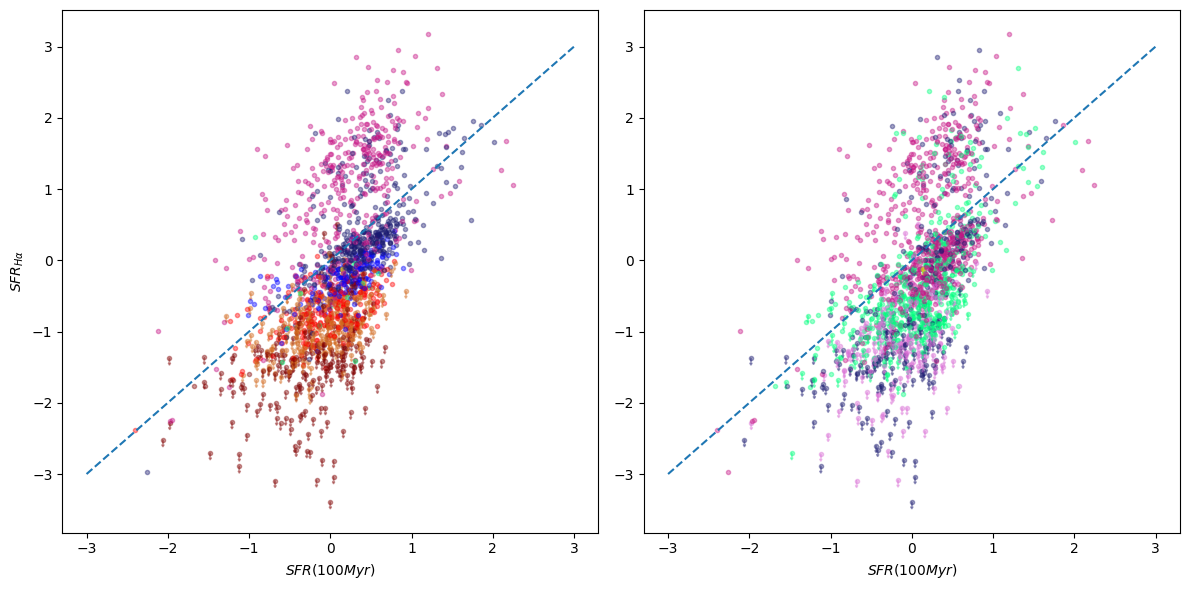

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

for i in range(len(CATAID)):
    if HA_er[i] > 0 and HB_er[i] > 0 and HA[i] != -99999.0 and HB[i] != -99999.0 and HA[i] > 2*HA_er[i] and HB[i] > 2*HB_er[i] and HA[i]/HB[i] > 2.86:
        f_HA = ((HA[i]/HB[i])/2.86)**(2.114)
        HA[i] *= f_HA
        HA_er[i] *= f_HA
    sfr_HA, sfr_HA_er = SFR(HA[i], HA_er[i], Z[i])

    if sfr_HA > 0:
        axs[0].scatter(SFR_50_M[i]+MS[i], math.log10(sfr_HA), color=cd_WHAN[FLAGS_WHAN[i]][0], alpha = 0.4, marker='.')
        axs[1].scatter(SFR_50_M[i]+MS[i], math.log10(sfr_HA), color=color_dict[FLAGS_BPT[i]][0], alpha = 0.4, marker='.')

    if sfr_HA > 0 and sfr_HA_er == '-':
        axs[0].arrow(SFR_50_M[i]+MS[i], math.log10(sfr_HA), 0, -0.07, head_width=0.03,
            head_length=0.03, color=cd_WHAN[FLAGS_WHAN[i]][0], alpha=0.4)
        axs[1].arrow(SFR_50_M[i]+MS[i], math.log10(sfr_HA), 0, -0.07, head_width=0.03,
        head_length=0.03, color=color_dict[FLAGS_BPT[i]][0], alpha=0.4)

axs[0].set_ylabel(r'$SFR_{H\alpha}$')
axs[1].set_xlabel(r'$SFR (100 Myr)$')
axs[0].set_xlabel(r'$SFR (100 Myr)$')

axs[0].plot([-3, 3], [-3, 3], linestyle='dashed')
axs[1].plot([-3, 3], [-3, 3], linestyle='dashed')

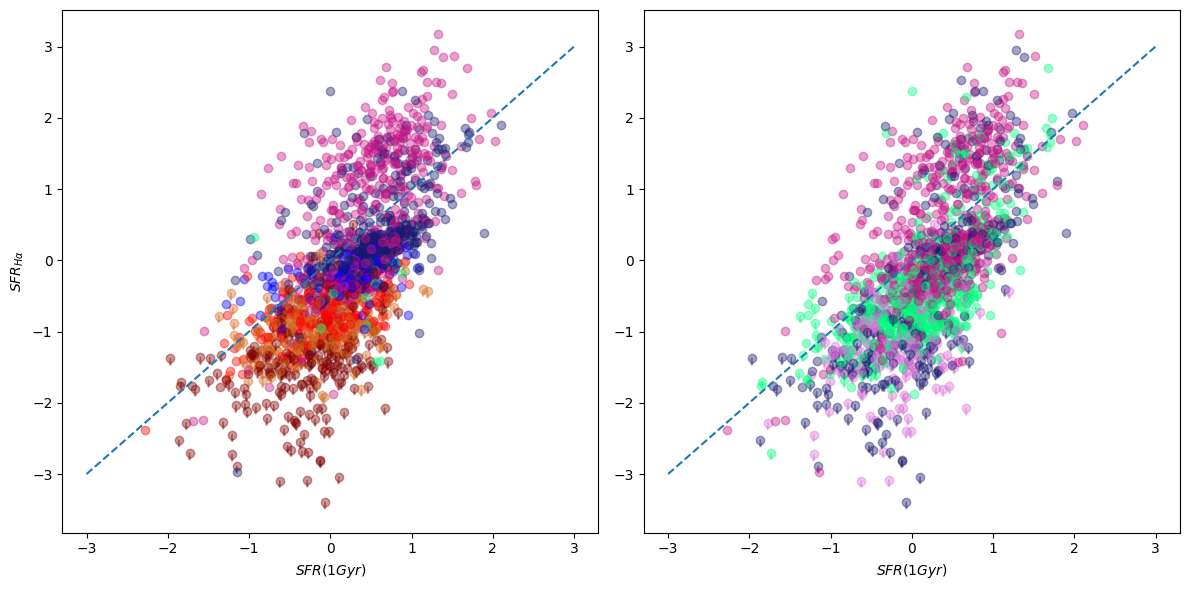

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

for i in range(len(CATAID)):
    
    sfr_HA, sfr_HA_er = SFR(HA[i], HA_er[i], Z[i])

    if sfr_HA > 0:
        axs[0].scatter(SFR_50[i], math.log10(sfr_HA), color=cd_WHAN[FLAGS_WHAN[i]][0], alpha = 0.4)
        axs[1].scatter(SFR_50[i], math.log10(sfr_HA), color=color_dict[FLAGS_BPT[i]][0], alpha = 0.4)

    if sfr_HA > 0 and sfr_HA_er == '-':
        axs[0].arrow(SFR_50[i], math.log10(sfr_HA), 0, -0.07, head_width=0.03,
            head_length=0.03, color=cd_WHAN[FLAGS_WHAN[i]][0], alpha=0.4)
        axs[1].arrow(SFR_50[i], math.log10(sfr_HA), 0, -0.07, head_width=0.03,
        head_length=0.03, color=color_dict[FLAGS_BPT[i]][0], alpha=0.4)

axs[0].set_ylabel(r'$SFR_{H\alpha}$')
axs[1].set_xlabel(r'$SFR (1 Gyr)$')
axs[0].set_xlabel(r'$SFR (1 Gyr)$')

axs[0].plot([-3, 3], [-3, 3], linestyle='dashed')
axs[1].plot([-3, 3], [-3, 3], linestyle='dashed')